In [4]:
from ase import Atoms
from ase.lattice import bulk
from ase.lattice.cubic import *
from ase.lattice.hexagonal import *
from ase.visualize import view
from gpaw import GPAW,PW
import matplotlib.pyplot as plt
import math
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')

In [5]:
#MOLECULE VIEWER CODE
from IPython.display import HTML
def atoms_to_html(atoms):
    'Return the html representation the atoms object as string'

    from tempfile import NamedTemporaryFile

    with NamedTemporaryFile('r+', suffix='.html') as ntf:
        atoms.write(ntf.name, format='html')
        ntf.seek(0)
        html = ntf.read()
    return html

# Crystal structures

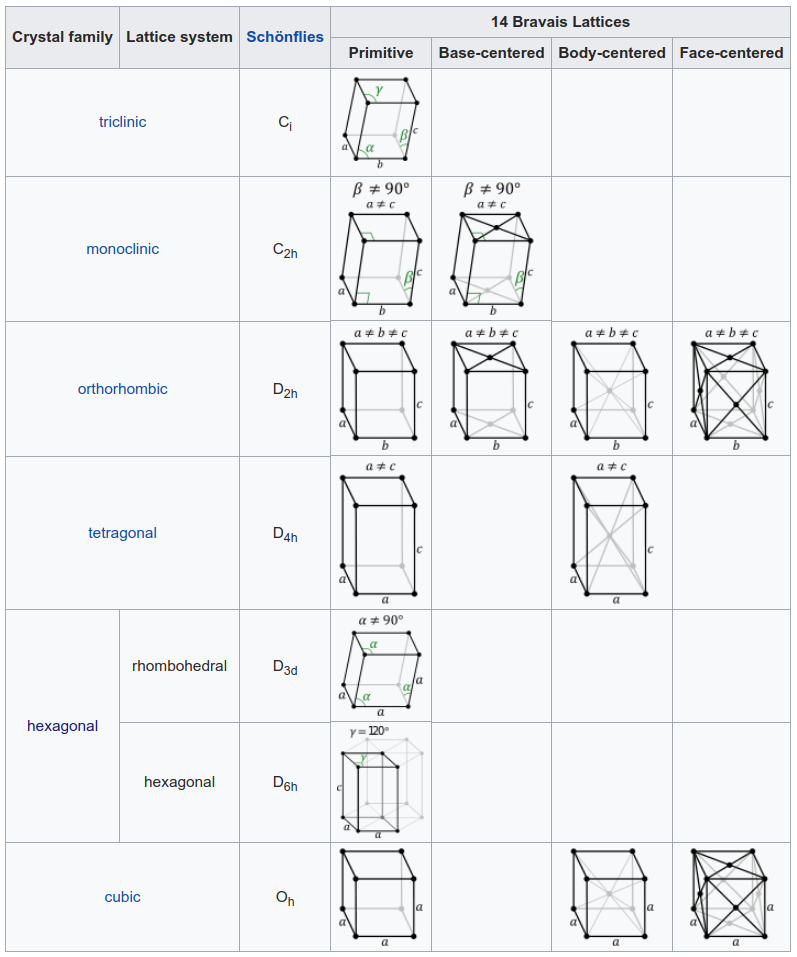

In [15]:
#Table from wikipedia: https://en.wikipedia.org/wiki/Crystal_structure
Image("Bravais.png")

## Primitive Cubic structure

In [73]:
#Try changing size parameters
atoms = SimpleCubic(size=(2,2,2), symbol='Po', pbc=(1,1,1))
HTML(atoms_to_html(atoms))

### Packing efficiency

In [142]:
r = 3.35/2. #Å, half a lattice parameter 
V = 4/3.*math.pi*r**3
C = (2*r)**3
round(8*(1/8.)*V/C*100)

52.0

### Density of polonium

In [143]:
M = 210 #g/mol
NA = 6.022*10**23 #1/mol
A = 10**(-8) #A => cm
M/NA/(C*A**3)

9.275645076862537

## Body Centred Cubic Structure

In [112]:
#Try changing size parameters
atoms = BodyCenteredCubic(size=(2,2,2), symbol='K', pbc=(1,1,1))
del atoms[[15,13,11,9,7,5,3]]
HTML(atoms_to_html(atoms))

### Packing efficiency

In [144]:
r =5.23*math.sqrt(3)/4. #Å, sqrt(3)/4 a lattice parameter 
V = 4/3.*math.pi*r**3
C = 64/(3*math.sqrt(3))*r**3
round((1+8*1/8.)*V/C*100)

68.0

### Kaaliumi tihedus

In [145]:
M = 39 #g/mol
NA = 6.022*10**23 #1/mol
A = 10**(-8) #A => cm
(1+8*1/8.)*M/NA/(C*A**3)

0.9054172927382501

## Cubic close packing 

In [113]:
#Try changing size parameters
atoms = FaceCenteredCubic(size=(2,2,2), symbol='Cu', pbc=(1,1,1))
del atoms[[31,30,29,27,26,25,23,22,21,19,18,15,14,13,11,9,6,5]]
HTML(atoms_to_html(atoms))

In [117]:
#Try changing size parameters
atoms = FaceCenteredCubic(size=(2,2,2), symbol='Cu', pbc=(1,1,1))
view(atoms)
del atoms[[27,24,22,20,19,18,16,13,12,11,9,8,6,5,4,3,2,1,0]]
HTML(atoms_to_html(atoms))

### Packing efficiency

In [146]:
r =3.597*math.sqrt(2)/4. #Å, half a lattice parameter 
V = 4/3.*math.pi*r**3
C = 64/(2*math.sqrt(2))*r**3
round((6*1/2.+8*1/8.)*V/C*100)

74.0

### Vase tihedus

In [147]:
M = 63.5 #g/mol
(6*1/2.+8*1/8.)*M/NA/(C*A**3)

9.062993155080616

## Hexoganal close packing 

In [128]:
#Try changing size parameters
atoms = HexagonalClosedPacked(size=(3,3,2), symbol='La', pbc=(1,1,1))
view(atoms)
del atoms[[35,33,31,30,29,27,25,23,22,21,19,17,15,13,12,11,7,5,4]]
HTML(atoms_to_html(atoms))


In [134]:
#Try changing size parameters
atoms = HexagonalClosedPacked(size=(3,3,2), symbol='La', pbc=(1,1,1))
del atoms[[35,33,31,30,29,25,23,22,17,16,15,14,13,12,11,10,8,7,6,5,4,2,0]]
HTML(atoms_to_html(atoms))

### Packing efficiency

In [150]:
r =3.772/2. #Å, half a lattice parameter 
V = 4/3.*math.pi*r**3
C = 24*(math.sqrt(2))*r**3
round((6)*V/C*100)

74.0

In [152]:
M = 139 #g/mol
round((6)*M/NA/(C*A**3))

6.0

## Carbon group

In [7]:
#Diamond structure in a cubic representation
atoms = bulk('C', 'diamond', cubic=True)
atoms.repeat((2,2,2))
HTML(atoms_to_html(atoms))

In [6]:
#Graphite strcuture
Gr = Graphite(symbol='C',latticeconstant={'a':2.461,'c':6.708},size=(1,1,1))
HTML(atoms_to_html(atoms.repeat((3,3,1))))

## Nitrogen group

In [24]:
#Antimony structure

da = 4.48
dl = 1.51
sqrt = math.sqrt(3)

atoms = Atoms('Sb2', positions=[(0.0000, 0.0000,       -dl), (da/2,   sqrt*da/6,    0.0)],
              cell=((da,0,0), (da/2,sqrt*da/2,0), (0,0,3*dl))) #has to be fixed, as the z-vector is wrong

HTML(atoms_to_html(atoms.repeat((3,3,1))))